<a href="https://colab.research.google.com/github/ushasreepothukunta/G7_DS/blob/main/Mini%20Projects/Usha%20Sree/BIKE_SHARING_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_set=pd.read_csv('hour.csv')
data_set.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [4]:
data_set.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
data_set.apply(lambda x:len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [7]:
data_set.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
data_set=data_set.rename(columns={'yr':'year','mnth':'month','hr':'hour','weathersit':'weather','hum':'humidity','cnt':'count'})

In [9]:
data_set.head(10)

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [10]:
data_set=data_set.drop(columns=['instant','dteday','year'])

In [11]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   month       17379 non-null  int64  
 2   hour        17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weather     17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   humidity    17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  count       17379 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.9 MB


In [14]:
cols=['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
  data_set[col]=data_set[col].astype('category')

In [15]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


**EDA**

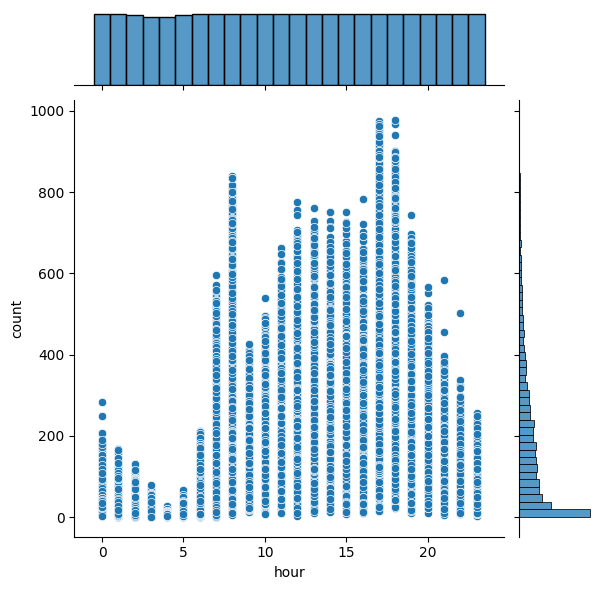

In [17]:
sns.jointplot(x='hour',y='count',data=data_set)

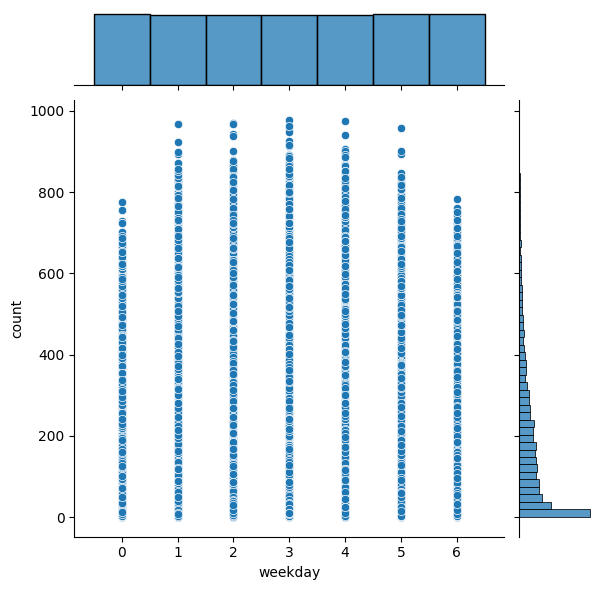

In [18]:
sns.jointplot(x='weekday',y='count',data=data_set)

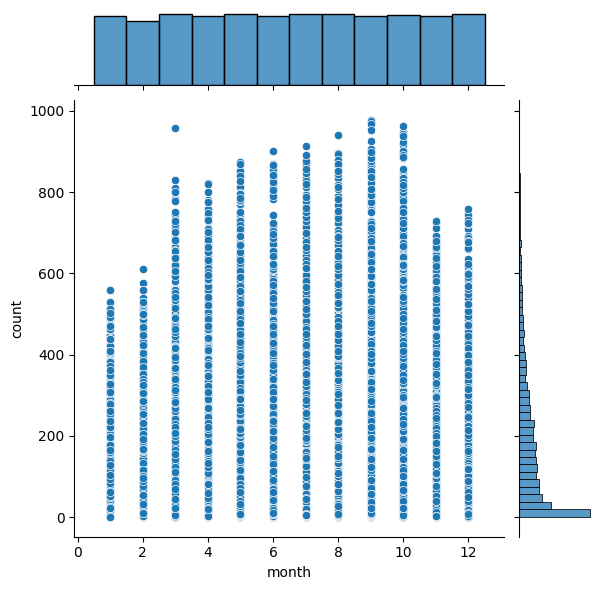

In [19]:
sns.jointplot(x='month',y='count',data=data_set)

<Axes: ylabel='Frequency'>

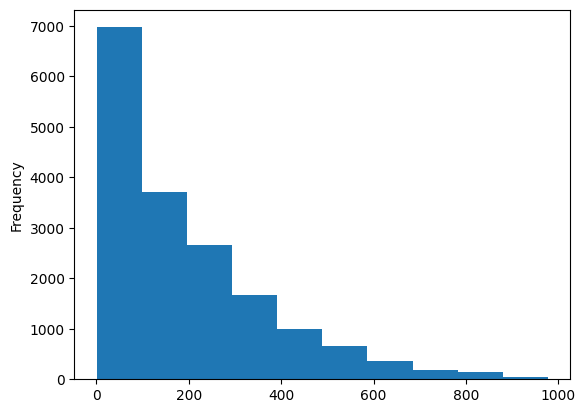

In [20]:
data_set['count'].plot.hist()

Text(0.5, 1.0, 'Hourly Bike Rental Counts by Weekday')

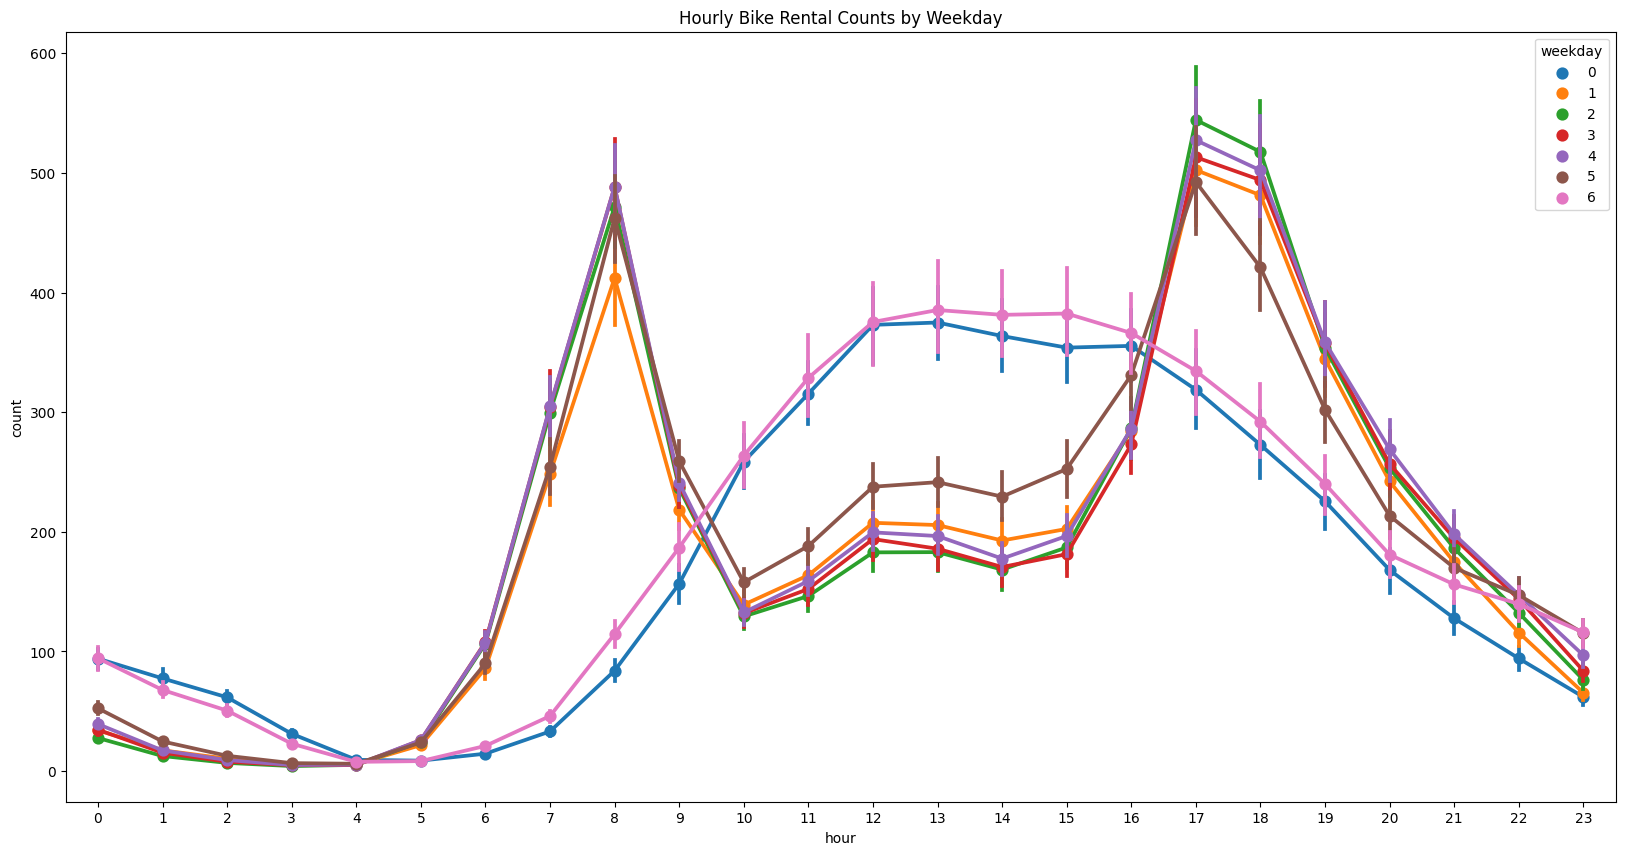

In [21]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=data_set,x='hour',y='count',hue='weekday',ax=ax)
ax.set_title("Hourly Bike Rental Counts by Weekday")

Text(0.5, 1.0, 'Hourly Bike Rental Counts by Weather Condition')

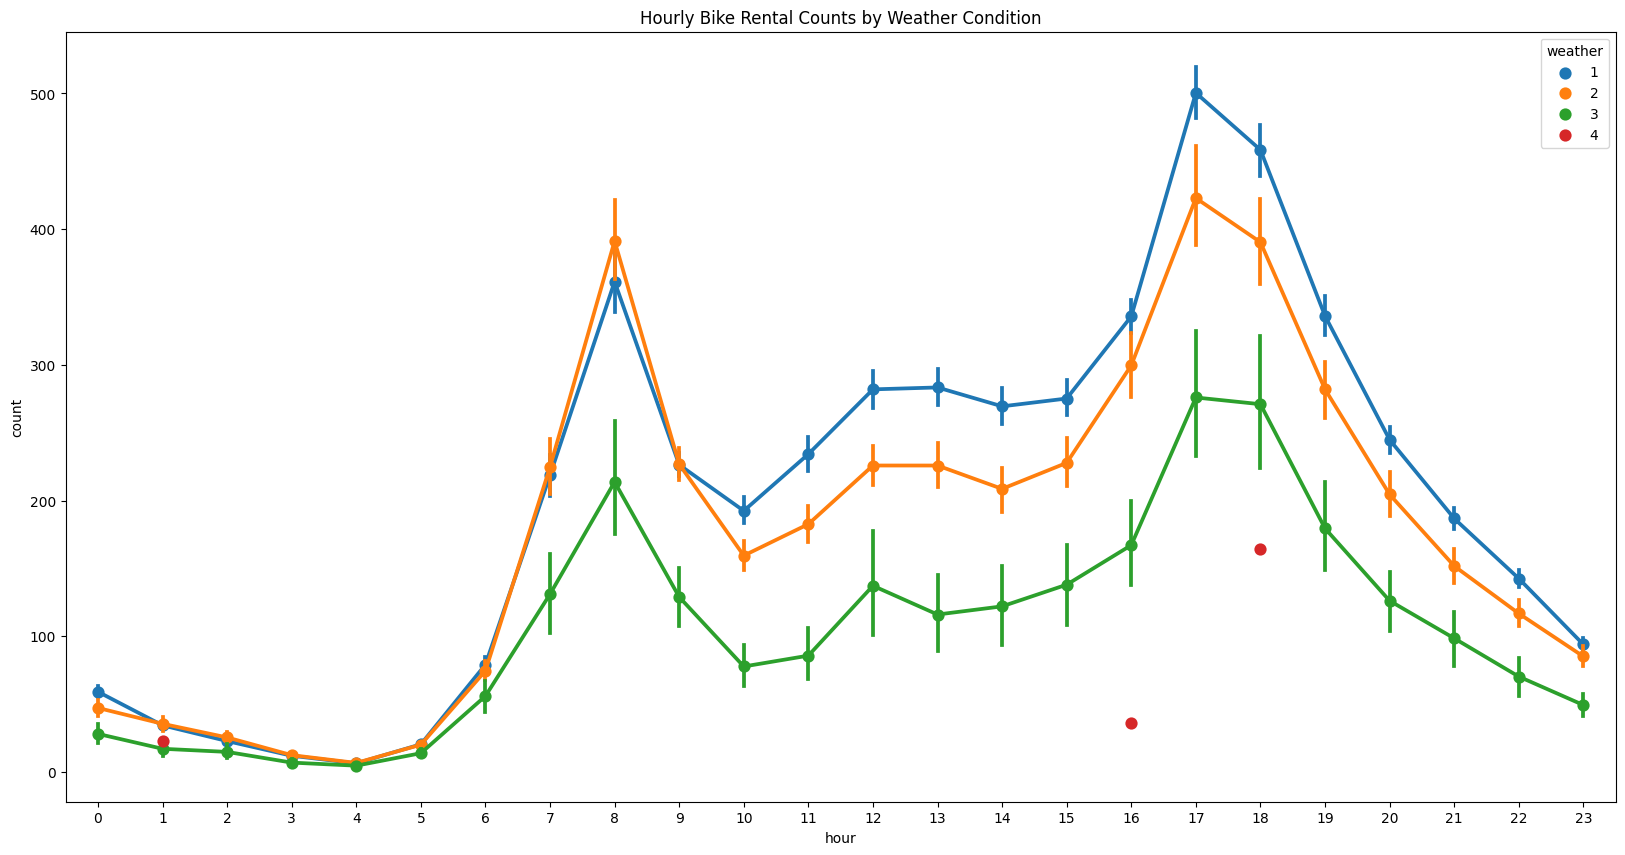

In [22]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=data_set,x='hour',y='count',hue='weather',ax=ax)
ax.set_title("Hourly Bike Rental Counts by Weather Condition")


NameError: ignored

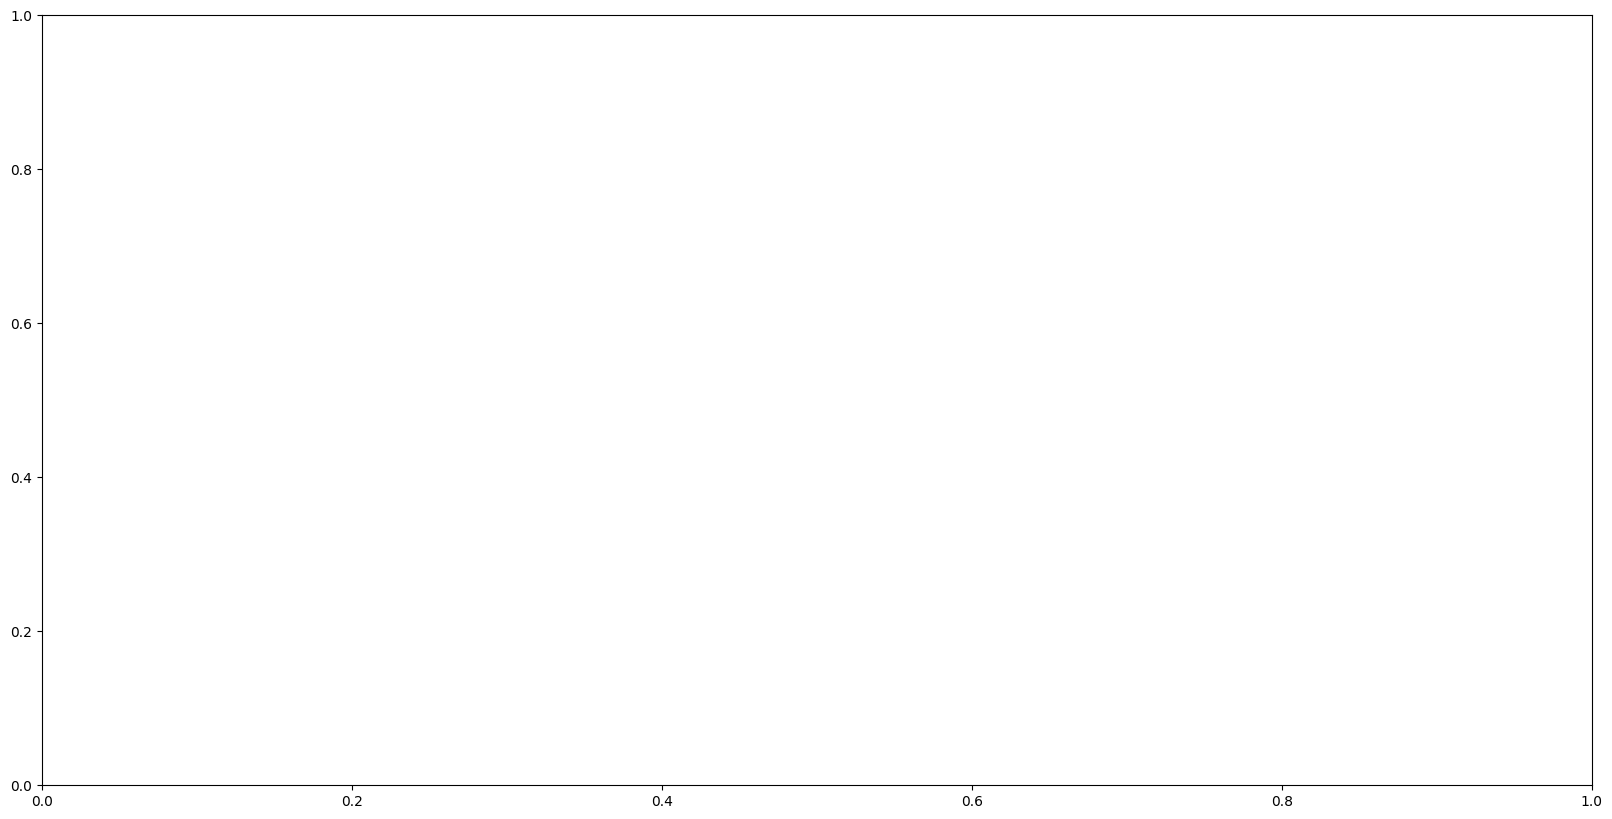

In [23]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=data_Set,x='hour',y='count',hue='season',ax=ax)
ax.set_title("Hourly Bike Rental Counts by Season")


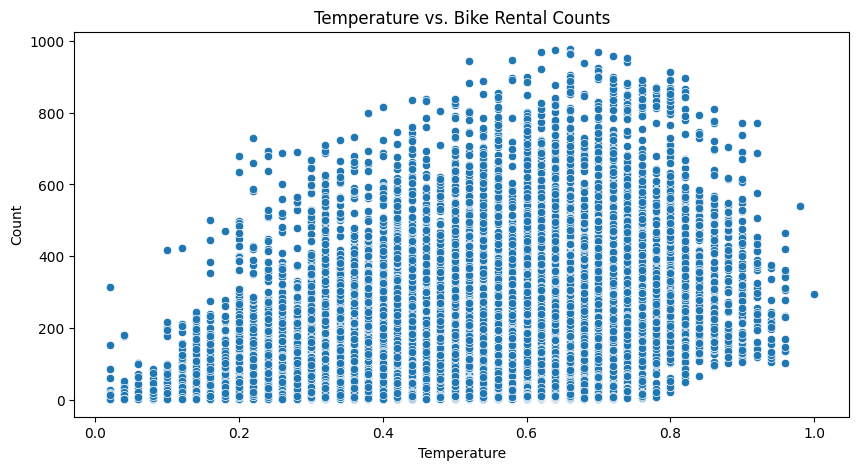

In [24]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data_set, x='temp', y='count')
plt.title('Temperature vs. Bike Rental Counts')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Average Bike Rental Counts by Weekday')

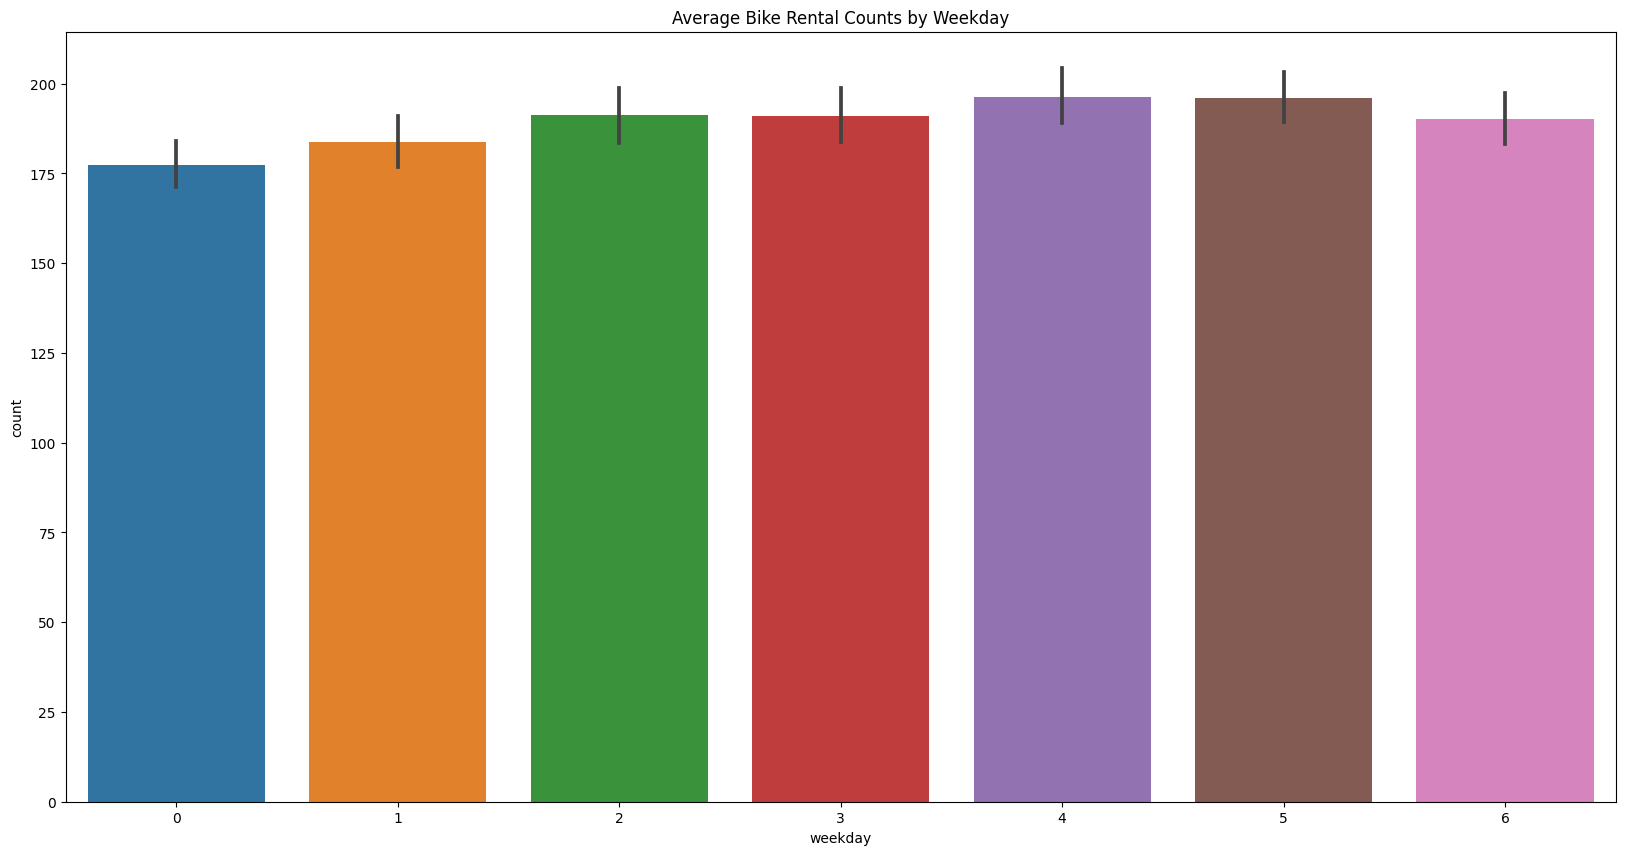

In [25]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=data_set,x='weekday',y='count',ax=ax)
ax.set_title("Average Bike Rental Counts by Weekday")


Text(0.5, 1.0, 'Average Bike Rental Counts by Month')

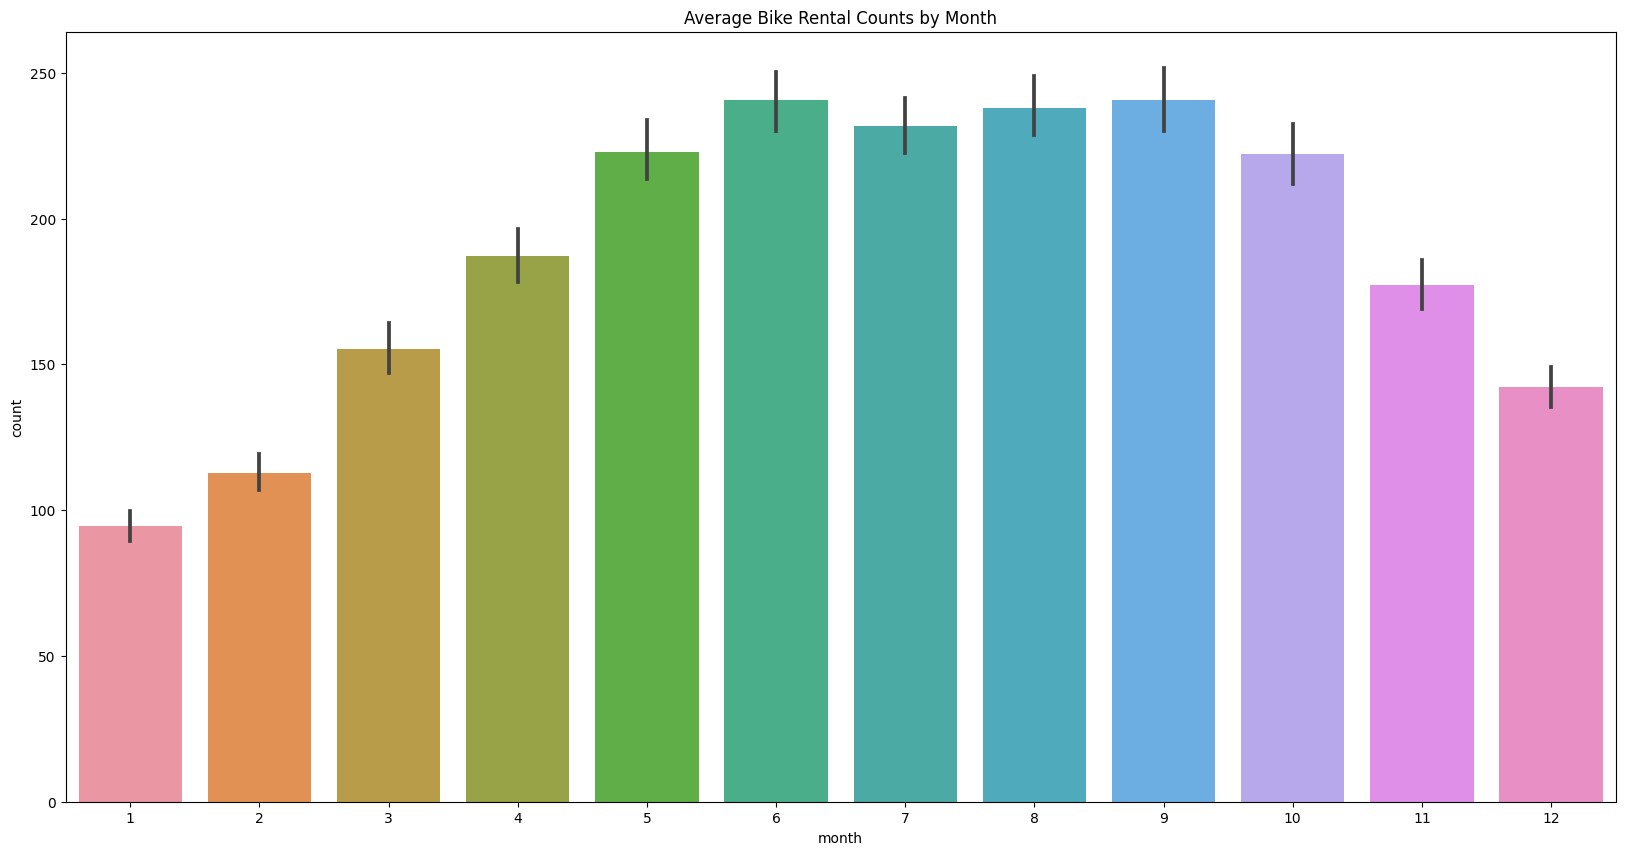

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=data_set, x='month', y='count', ax=ax)
ax.set_title("Average Bike Rental Counts by Month")


<Axes: xlabel='weather', ylabel='count'>

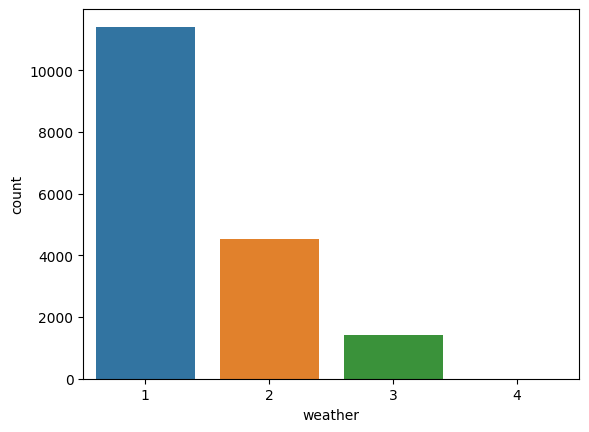

In [27]:
sns.countplot(x='weather',data=data_set)

In [28]:
import plotly.express as px

fig = px.histogram(data_set, x='temp', nbins=30, title='Distribution of Temperature')
fig.update_xaxes(title_text='Temperature')
fig.update_yaxes(title_text='Count')
fig.show()

In [29]:

fig = px.line(data_set, x='hour', y='count', title='Hourly Bike Rental Counts')
fig.update_xaxes(title_text='Hour of the Day')
fig.update_yaxes(title_text='Count')
fig.show()

In [30]:
fig = px.scatter(data_set, x='temp', y='count', title='Temperature vs. Bike Rental Counts')
fig.update_xaxes(title_text='Temperature')
fig.update_yaxes(title_text='Count')
fig.show()

In [32]:
fig = px.scatter(data_set, x='temp', y='count', title='Humidity vs. Bike Rental Counts')
fig.update_xaxes(title_text='Humidity')
fig.update_yaxes(title_text='Count')
fig.show()

In [33]:
fig = px.box(data_set, y='count', title='Box Plot of Bike Rental Counts')
fig.update_yaxes(title_text='Bike Rental Counts')
fig.show()

<Axes: >

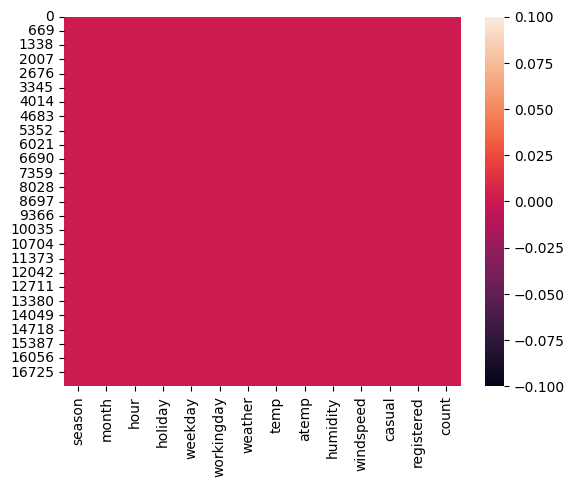

In [34]:
sns.heatmap(data_set.isnull())

In [35]:
data_set['count']=np.log(data_set['count'])

<ipython-input-36-139954d26f13>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



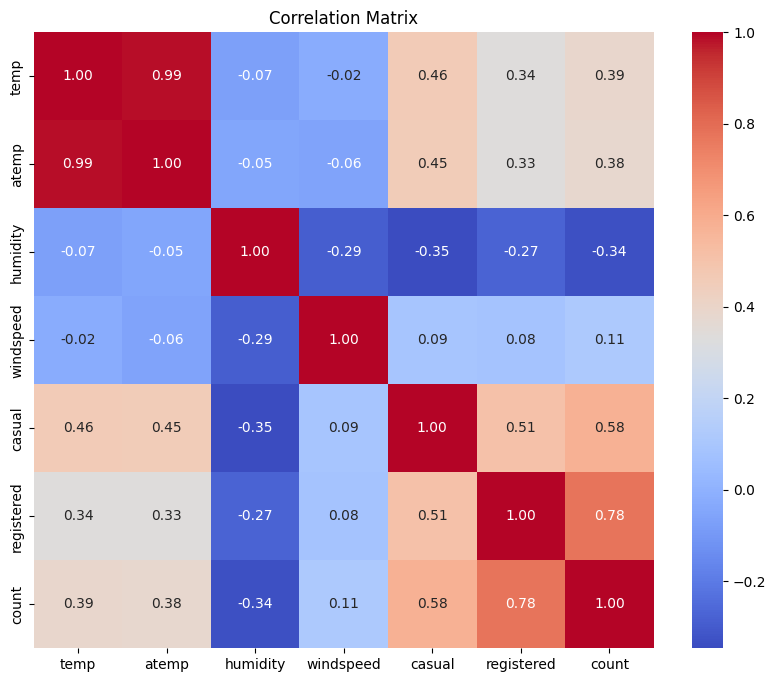

In [36]:
corr = data_set.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [37]:
cols = ["season","month", "hour", "holiday", "weekday", "workingday", "weather"]

In [38]:
df=pd.get_dummies(data_set,columns=cols,drop_first=True)

In [39]:
df

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0000,3,13,2.772589,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0000,8,32,3.688879,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0000,5,27,3.465736,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0000,3,10,2.564949,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0000,0,1,0.000000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.2576,0.60,0.1642,11,108,4.779123,0,0,0,...,1,0,0,0,0,0,1,1,0,0
17375,0.26,0.2576,0.60,0.1642,8,81,4.488636,0,0,0,...,1,0,0,0,0,0,1,1,0,0
17376,0.26,0.2576,0.60,0.1642,7,83,4.499810,0,0,0,...,1,0,0,0,0,0,1,0,0,0
17377,0.26,0.2727,0.56,0.1343,13,48,4.110874,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [40]:
ss=df.corr()

<Axes: >

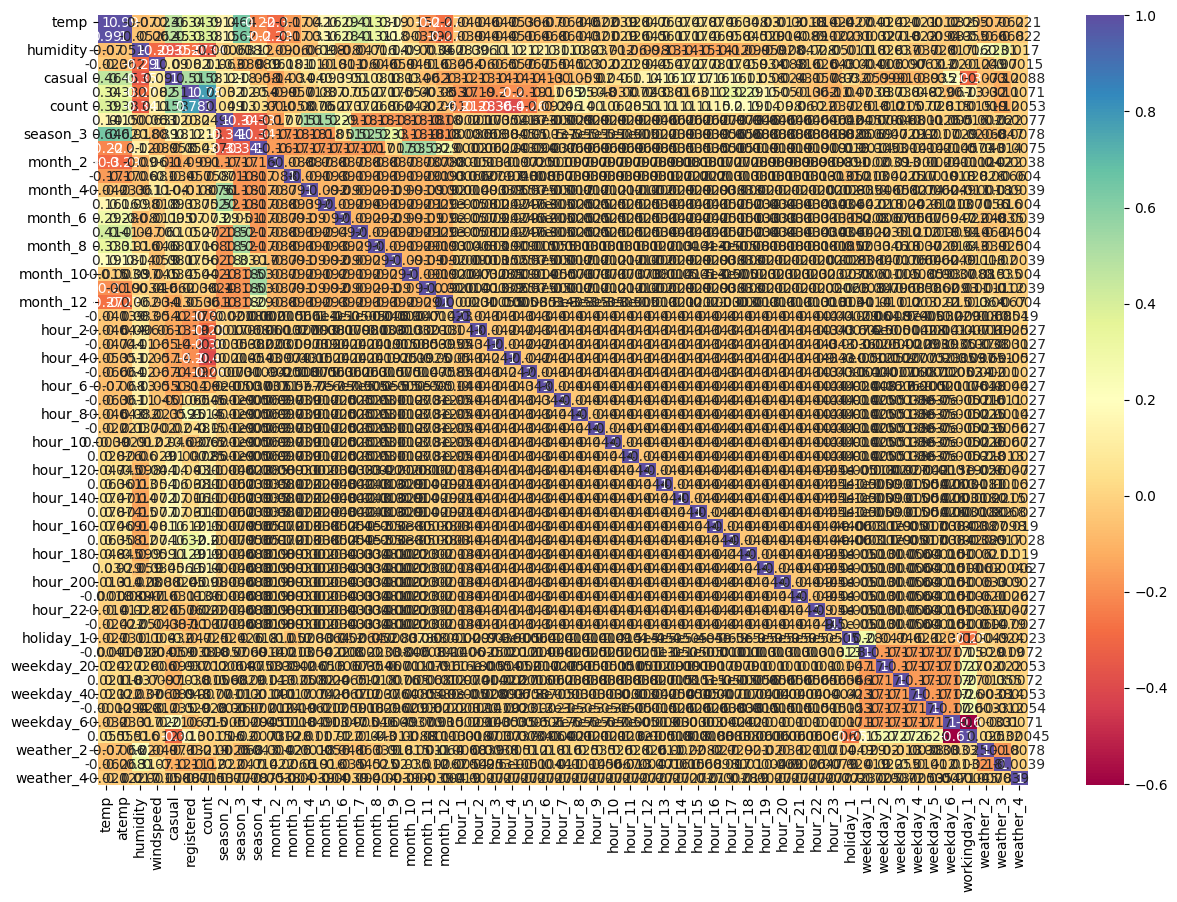

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(ss,annot=True,annot_kws={'size':10},cmap="Spectral")

# **Models**

In [42]:
X=data_set.loc[:,data_set.columns!="count"]
Y=data_set["count"]

In [43]:
from sklearn.model_selection import train_test_split as tts

In [44]:
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=42)

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [DecisionTreeRegressor(max_depth=7),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [46]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=42,shuffle=True)
    pred = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [47]:
for model in models:
    train(model)

Model: DecisionTreeRegressor(max_depth=7)
CV score: 0.0045938772288204
Model: RandomForestRegressor()
CV score: 0.00014835796755321992
Model: ExtraTreesRegressor()
CV score: 0.00014258402238547663
Model: GradientBoostingRegressor()
CV score: 0.0010042123668108018


In [48]:
from sklearn import tree
Decision=tree.DecisionTreeRegressor(max_depth=7)
Decision.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=7)

In [49]:
y_test_pred=Decision.predict(X_test)

In [50]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_test_pred)

0.9979243170338175

In [51]:
!pip install graphviz

In [52]:
from sklearn.tree import export_graphviz
import graphviz

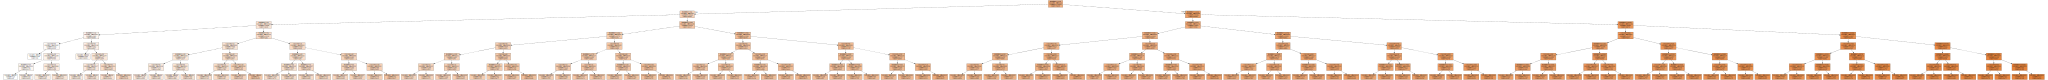

In [55]:
dot_data = export_graphviz(Decision, out_file=None, filled=True,feature_names=X_train.columns)
graph = graphviz.Source(dot_data)
graph

In [56]:
graph.render("decision_tree")
graph.view("decision_tree")

'decision_tree.pdf'